In [26]:
# Observations
# Strong - based on linear regression, there seems to be a strong correlation between latitude and max temperature
# Some - based on linear regression, in the northern hemisphere there seems to be some correlation 
#             between latitude and humidity
# No Correlation - based on linear regression, in the southern hemisphere there seems to be no correlation 
#             between latitude and humidity and in both hemispheres there appears to be no correlation 
#             between latitude and wind speed


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api_key
query_url = f"{url}appid={api_key}&units={units}&q="
response_test = requests.get(query_url + 'mantua').json()
pprint(response_test)

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 45.17, 'lon': 10.78},
 'dt': 1587240846,
 'id': 3174050,
 'main': {'feels_like': 60.8,
          'humidity': 64,
          'pressure': 1014,
          'temp': 61.41,
          'temp_max': 63,
          'temp_min': 59},
 'name': 'Province of Mantua',
 'sys': {'country': 'IT',
         'id': 2011529,
         'sunrise': 1587183961,
         'sunset': 1587233151,
         'type': 3},
 'timezone': 7200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 188, 'speed': 0.81}}


In [7]:
response_test['sys']['country']

'IT'

In [8]:
city_name=[]
country=[]
lat = []
lng = []
temp = []
date = []
humidity = []
max_temp = []
wind_speed = []
cloudiness = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
    
        print(f'{city} found.  Getting Data.')

    except (KeyError, IndexError, ValueError):
        print(f'{city} Not found. Skipping...')

print('Finished Reading Data')

severo-kurilsk found.  Getting Data.
dikson found.  Getting Data.
lasa found.  Getting Data.
vaini found.  Getting Data.
bluff found.  Getting Data.
hermanus found.  Getting Data.
busselton found.  Getting Data.
havelock found.  Getting Data.
tabarqah Not found. Skipping...
mataura found.  Getting Data.
zhicheng found.  Getting Data.
sakaiminato found.  Getting Data.
halalo Not found. Skipping...
hobart found.  Getting Data.
karratha found.  Getting Data.
port elizabeth found.  Getting Data.
butaritari found.  Getting Data.
aklavik found.  Getting Data.
coquimbo found.  Getting Data.
port-gentil found.  Getting Data.
shimoda found.  Getting Data.
tuktoyaktuk found.  Getting Data.
saint-felicien found.  Getting Data.
nanortalik found.  Getting Data.
rikitea found.  Getting Data.
pilar do sul found.  Getting Data.
upernavik found.  Getting Data.
albany found.  Getting Data.
tilichiki found.  Getting Data.
whyalla found.  Getting Data.
halifax found.  Getting Data.
bethel found.  Getting 

kavieng found.  Getting Data.
yuksekova found.  Getting Data.
saint-denis found.  Getting Data.
dekar found.  Getting Data.
ust-nera found.  Getting Data.
llata found.  Getting Data.
mandiana found.  Getting Data.
toliary Not found. Skipping...
delta del tigre found.  Getting Data.
pio xii found.  Getting Data.
manaia found.  Getting Data.
xingyi found.  Getting Data.
hefei found.  Getting Data.
kailua found.  Getting Data.
port keats found.  Getting Data.
manta found.  Getting Data.
mount gambier found.  Getting Data.
pisco found.  Getting Data.
nautla found.  Getting Data.
nicosia found.  Getting Data.
nizhneyansk Not found. Skipping...
souillac found.  Getting Data.
pemangkat found.  Getting Data.
saint-augustin found.  Getting Data.
ozorkow found.  Getting Data.
alto piquiri found.  Getting Data.
de-kastri found.  Getting Data.
carnarvon found.  Getting Data.
mayumba found.  Getting Data.
tandil found.  Getting Data.
san blas found.  Getting Data.
miandrivazo found.  Getting Data.


andenes found.  Getting Data.
mehamn found.  Getting Data.
geraldton found.  Getting Data.
smithers found.  Getting Data.
richards bay found.  Getting Data.
ati found.  Getting Data.
kasempa found.  Getting Data.
sumenep found.  Getting Data.
berdigestyakh found.  Getting Data.
poso found.  Getting Data.
matara found.  Getting Data.
general cepeda found.  Getting Data.
pangnirtung found.  Getting Data.
anloga found.  Getting Data.
horsham found.  Getting Data.
mezen found.  Getting Data.
tateyama found.  Getting Data.
sidrolandia found.  Getting Data.
coihaique found.  Getting Data.
sorvag Not found. Skipping...
pangoa found.  Getting Data.
lompoc found.  Getting Data.
swan hill found.  Getting Data.
preobrazheniye found.  Getting Data.
bubaque found.  Getting Data.
pangkalanbuun found.  Getting Data.
lawrenceburg found.  Getting Data.
wattegama found.  Getting Data.
grand island found.  Getting Data.
pacific grove found.  Getting Data.
svetlogorsk found.  Getting Data.
wanning found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_dict = {"Country": country,
                "City": city_name,
                "Lat": lat,
                "Lng": lng,
                "Temp F": temp,
                "Date": date,
                "Humidity": humidity,
                "Max Temp": max_temp,
                "Wind Speed": wind_speed,
                "Cloudiness": cloudiness
               }
cities_data = pd.DataFrame(cities_dict)

cities_data.to_csv(output_data_file)
cities_data.head()

,Country,City,Lat,Lng,Temp F,Date,Humidity,Max Temp,Wind Speed,Cloudiness
0,RU,Severo-Kuril'sk,50.68,156.12,34.39,1587240637,88,34.39,10.07,9
1,RU,Dikson,73.51,80.55,35.24,1587240493,89,35.24,19.10,100
2,IT,Laas,46.62,10.70,55.40,1587240649,58,55.40,2.24,40
3,TO,Vaini,-21.20,-175.20,77.00,1587240488,83,77.00,10.29,40
4,NZ,Bluff,-46.60,168.33,43.00,1587240576,91,43.00,5.01,100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

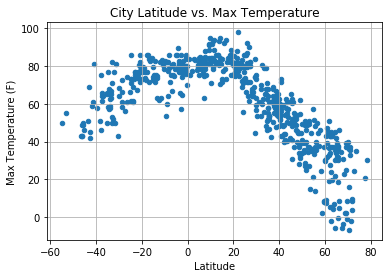

In [10]:
cities_data.plot(x='Lat', y='Max Temp', kind='scatter')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

#### Latitude vs. Humidity Plot

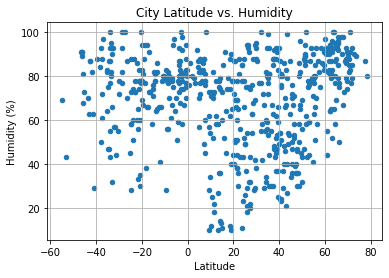

In [11]:
cities_data.plot(x='Lat', y='Humidity', kind='scatter')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

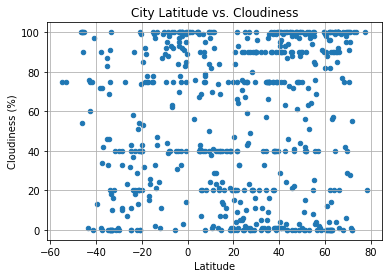

In [12]:
cities_data.plot(x='Lat', y='Cloudiness', kind='scatter')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

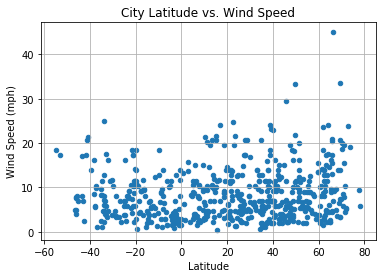

In [13]:
cities_data.plot(x='Lat', y='Wind Speed', kind='scatter')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities = cities_data.loc[cities_data['Lat']>0,:]
southern_cities = cities_data.loc[cities_data['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.788


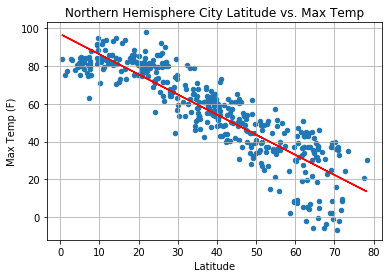

In [16]:
x_values = northern_cities['Lat']
y_values = northern_cities['Max Temp']

(slope, y_inter, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + y_inter

print(f"The r-squared is: {round(rvalue**2,3)}")

northern_cities.plot(x='Lat', y='Max Temp', kind='scatter')

plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere City Latitude vs. Max Temp")
plt.grid(True)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.468


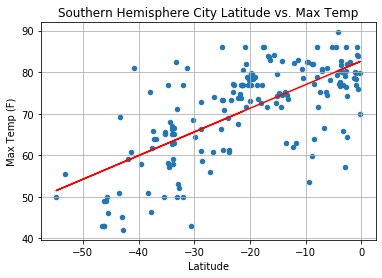

In [17]:
x_values = southern_cities['Lat']
y_values = southern_cities['Max Temp']

(slope, y_inter, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + y_inter

print(f"The r-squared is: {round(rvalue**2,3)}")

southern_cities.plot(x='Lat', y='Max Temp', kind='scatter')

plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere City Latitude vs. Max Temp")
plt.grid(True)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.083


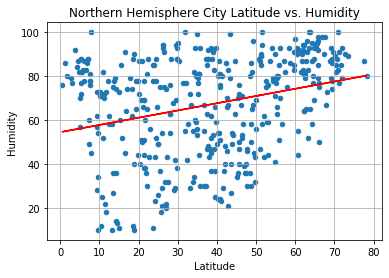

In [18]:
x_values = northern_cities['Lat']
y_values = northern_cities['Humidity']

(slope, y_inter, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + y_inter

print(f"The r-squared is: {round(rvalue**2,3)}")

northern_cities.plot(x='Lat', y='Humidity', kind='scatter')

plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.grid(True)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005


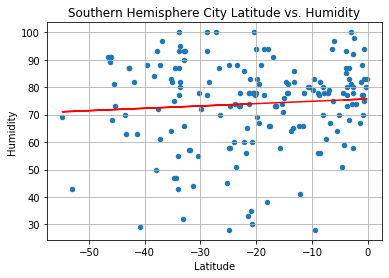

In [19]:
x_values = southern_cities['Lat']
y_values = southern_cities['Humidity']

(slope, y_inter, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + y_inter

print(f"The r-squared is: {round(rvalue**2,3)}")

southern_cities.plot(x='Lat', y='Humidity', kind='scatter')

plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.grid(True)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.018


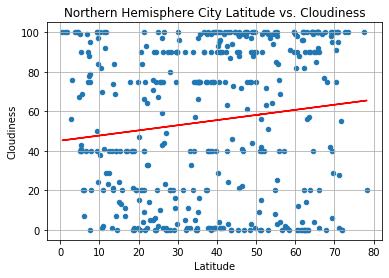

In [20]:
x_values = northern_cities['Lat']
y_values = northern_cities['Cloudiness']

(slope, y_inter, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + y_inter

print(f"The r-squared is: {round(rvalue**2,3)}")

northern_cities.plot(x='Lat', y='Cloudiness', kind='scatter')

plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.grid(True)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.075


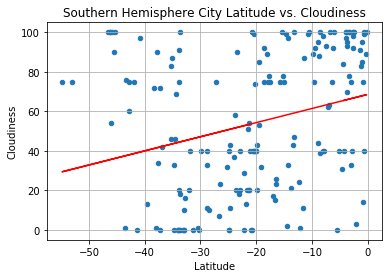

In [21]:
x_values = southern_cities['Lat']
y_values = southern_cities['Cloudiness']

(slope, y_inter, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + y_inter

print(f"The r-squared is: {round(rvalue**2,3)}")

southern_cities.plot(x='Lat', y='Cloudiness', kind='scatter')

plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.grid(True)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014


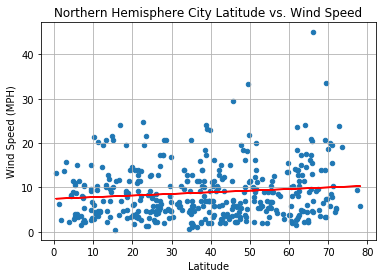

In [22]:
x_values = northern_cities['Lat']
y_values = northern_cities['Wind Speed']

(slope, y_inter, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + y_inter

print(f"The r-squared is: {round(rvalue**2,3)}")

northern_cities.plot(x='Lat', y='Wind Speed', kind='scatter')

plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.grid(True)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.102


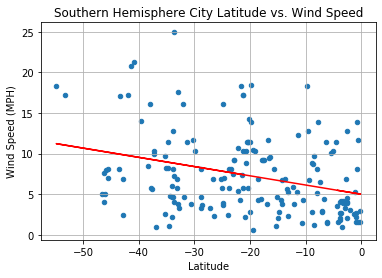

In [23]:
x_values = southern_cities['Lat']
y_values = southern_cities['Wind Speed']

(slope, y_inter, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + y_inter

print(f"The r-squared is: {round(rvalue**2,3)}")

southern_cities.plot(x='Lat', y='Wind Speed', kind='scatter')

plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.grid(True)